In [1]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

I found 1 face(s) in this photograph.


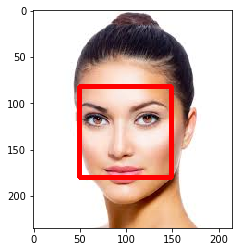

In [22]:
img = cv2.imread("face.jpg")

face_locations = face_recognition.face_locations(img, model="cnn")
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

In [18]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [23]:
frame = cv2.imread("face.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

Number of faces detected: 1
[(37, 79) (162, 203)]


In [24]:
print(rects[0])
shape = predictor(gray, rects[0])
print(shape)
#predictor: 구체적인 shape정보 리턴
shape = face_utils.shape_to_np(shape)
#객체 내에서 필요한 좌표 정보만 넘파이 객체로 뽑음
#순서대로 턱선부터 쭉 나타내는 좌표(아래 그림 참조)
print(shape)

[(37, 79) (162, 203)]
[[ 46 118]
 [ 47 131]
 [ 50 144]
 [ 54 158]
 [ 59 171]
 [ 66 184]
 [ 74 197]
 [ 84 207]
 [ 97 209]
 [112 207]
 [127 199]
 [140 190]
 [151 178]
 [157 164]
 [160 148]
 [162 131]
 [163 115]
 [ 50 103]
 [ 57  99]
 [ 65 101]
 [ 72 104]
 [ 80 107]
 [104 106]
 [114 101]
 [124  98]
 [134  98]
 [144 101]
 [ 93 120]
 [ 92 130]
 [ 92 141]
 [ 91 152]
 [ 85 158]
 [ 89 160]
 [ 93 161]
 [ 98 159]
 [103 157]
 [ 59 119]
 [ 65 115]
 [ 74 115]
 [ 80 122]
 [ 72 124]
 [ 64 123]
 [111 121]
 [117 115]
 [126 114]
 [132 118]
 [127 122]
 [118 123]
 [ 76 172]
 [ 83 169]
 [ 90 167]
 [ 95 169]
 [100 167]
 [109 169]
 [118 172]
 [110 181]
 [101 186]
 [ 95 186]
 [ 89 185]
 [ 82 180]
 [ 80 174]
 [ 90 174]
 [ 95 175]
 [101 175]
 [115 173]
 [101 175]
 [ 95 176]
 [ 89 175]]


<img src="facial_landmarks_68markup-768x619.jpg" width=400>

Detection 0: Left: 37 Top: 79 Right: 162 Bottom: 203


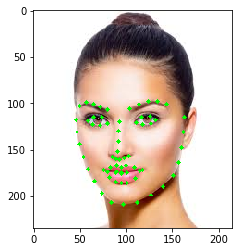

In [28]:
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape) #객체 내에서 필요한 좌표 정보만 넘파이 객체로 뽑음
        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

imshow("", frame) 

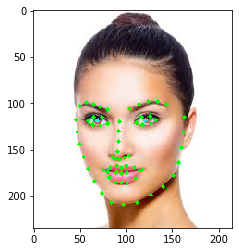

In [29]:
# 31~36 왼쪽눈에 해당하는 인덱스

eyel = np.mean(shape[36:42], axis=0) # 왼쪽눈
eyer = np.mean(shape[42:48], axis=0) # 오른쪽눈
cv2.circle(frame, (int(eyel[0]), int(eyel[1])), 2, (255,255,0), -1)
cv2.circle(frame, (int(eyer[0]), int(eyer[1])), 2, (255,255,0), -1)

imshow("",frame)

In [31]:
img = face_recognition.load_image_file("face.jpg")
face_encoding = face_recognition.face_encodings(img)
#print(face_encoding)
print(face_encoding[0].shape)

'''
얼굴 하나는 무조건 실수값 128차원이다. 효과적으로 축소 시켜 놓은 것
얼굴 고유의 DNA로 비유 할 수 있다.

이 데이터를 1차원 벡터로 DNN 학습을 시킬 수 있음
mninst는 28*28이므로 더 큼
'''

(128,)


## 다른이미지에서 유사한 얼굴 찾기

In [33]:
files = os.listdir("known")   # 아는 얼굴을 학습시키자
    
known_face_encodings = [] #다음 for문을 통해 128개의 실수값이 들어가게된다.
known_face_names = []

for filename in files:
            name, ext = os.path.splitext(filename)
            if ext == '.jpg':
                known_face_names.append(name)
                pathname = os.path.join("known", filename)
                img = face_recognition.load_image_file(pathname) #이거때문에 한사람의 얼굴만 있다고 가정해야함
                face_encoding = face_recognition.face_encodings(img)[0] #발견된 얼굴 중 0번째
                known_face_encodings.append(face_encoding) 


In [35]:
print(known_face_names)
print(known_face_encodings[0])

['irene']
[-0.07441821  0.07007888 -0.00912737 -0.08579889 -0.0738977   0.01981986
 -0.04622846 -0.06405937  0.19229139 -0.17920312  0.14234385 -0.12035625
 -0.22677144 -0.0200225  -0.07758671  0.26718223 -0.1556491  -0.14484295
 -0.0557136   0.0211548   0.09392562  0.04469125 -0.0526093   0.10158521
 -0.05632333 -0.30432373 -0.12888685 -0.03392394 -0.08069641 -0.07985888
 -0.05467819  0.05589827 -0.17307681 -0.01413973  0.01526576  0.07819744
  0.00912464 -0.12463125  0.14585772  0.0252618  -0.28384936  0.09648567
  0.13429147  0.22555022  0.12020008  0.00439582 -0.0570416  -0.17345673
  0.12430358 -0.19237734 -0.0159028   0.12918283  0.0304111   0.06146105
  0.03940511 -0.13558817  0.08209436  0.08122236 -0.15790124  0.01161877
  0.06353123 -0.07005349 -0.01281325 -0.11994006  0.16834474  0.12662344
 -0.0706475  -0.25786042  0.12272784 -0.19995388 -0.06798919  0.10188605
 -0.11753463 -0.20472749 -0.2742129  -0.00265715  0.32429031  0.14916326
 -0.18018292  0.1167127   0.05047826 -0.0

In [ ]:
test = face_recognition.load_image_file("joy.jpg")


face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:
    
     distances = face_recognition.face_distance(known_face_encodings, face_encoding)
     print(distances)
     min_value = min(distances)  

     name = "Unknown"
     if min_value < 0.6:
                    index = np.argmin(distances)
                    name = known_face_names[index]
print(name) 

In [ ]:
imagePaths = list(paths.list_images("known"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        
import pickle
data = {"encodings": knownEncodings, "names": knownNames} #딕셔너리로 넣고 딕셔너리로 나중에 읽음
f = open("known.bin", "wb")  #wb: write binary 
f.write(pickle.dumps(data))
f.close()

In [ ]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("songtest.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

In [ ]:
print(data["names"][0])
print(data["encoding"][0])